In [1]:
import boto3
from boto.s3.connection import S3Connection
import os
import json
import boto3
import boto.s3
import sys
import datetime
from boto.s3.key import Key
from pprint import pprint
import pandas as pd
import urllib
import csv
import io
import requests
import glob
import time
import matplotlib.pyplot as plt 

In [2]:
origdata = pd.read_csv('origdata.csv', delimiter=",")
svcgdata = pd.read_csv('svcgdata.csv', delimiter=",")

print (origdata.shape)
print (svcgdata.shape)


C:\Users\sneha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\sneha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(574982, 15)
(24798279, 19)


In [3]:
print(origdata.dtypes)
print (svcgdata.dtypes)

CreditScore                     object
FirstPaymentDate                 int64
MaturityDate                     int64
MortgageInsurancePercentage     object
OroginalCLTV                   float64
OriginalDTIRatio                object
OriginalUPB                      int64
OriginalLTV                    float64
OriginalInterestRate           float64
PPMFlag                         object
PropertyState                   object
PropertyType                    object
LoanSequenceNumber              object
OriginalLoanTerm                 int64
ServiceName                     object
dtype: object
LoanSequenceNumber                  object
CurrentActualUPB                   float64
CurrentLonDeliquencyStatus           int64
LoanAge                              int64
RemainingMonthsForLegalMaturity      int64
ModificationFlag                    object
ZeroBalanceCode                      int64
ZeroBalanceEffectiveDate           float64
CurrentInterestRate                float64
CurrentDeferre

In [4]:
svcgdata[["CurrentLonDeliquencyStatus","LoanAge", "RemainingMonthsForLegalMaturity","ZeroBalanceCode"]]=svcgdata[["CurrentLonDeliquencyStatus",
                                    "LoanAge", "RemainingMonthsForLegalMaturity",
                                    "ZeroBalanceCode"]].astype(int)

svcgdata[["CurrentActualUPB", "CurrentInterestRate", "CurrentDeferredUPB",
                                    "MIRecoveries", "NonMIRecoveries", "Expenses", "LegalCosts",
                                    "MaintenanceAndPreservationCosts", "TaxesAndInsurance",
                                    "ActualLossCalculation",
                                    "ModificationCost"]]=svcgdata[["CurrentActualUPB", "CurrentInterestRate", "CurrentDeferredUPB",
                                    "MIRecoveries", "NonMIRecoveries", "Expenses", "LegalCosts",
                                    "MaintenanceAndPreservationCosts", "TaxesAndInsurance",
                                    "ActualLossCalculation",
                                    "ModificationCost"]].astype(float)


svcgdata[["LoanSequenceNumber", "ModificationFlag", "ZeroBalanceEffectiveDate"]]=svcgdata[["LoanSequenceNumber", "ModificationFlag", "ZeroBalanceEffectiveDate"]].astype('str')

print(svcgdata.dtypes)


LoanSequenceNumber                  object
CurrentActualUPB                   float64
CurrentLonDeliquencyStatus           int32
LoanAge                              int32
RemainingMonthsForLegalMaturity      int32
ModificationFlag                    object
ZeroBalanceCode                      int32
ZeroBalanceEffectiveDate            object
CurrentInterestRate                float64
CurrentDeferredUPB                 float64
MIRecoveries                       float64
NetSalesProceeds                    object
NonMIRecoveries                    float64
Expenses                           float64
LegalCosts                         float64
MaintenanceAndPreservationCosts    float64
TaxesAndInsurance                  float64
ActualLossCalculation              float64
ModificationCost                   float64
dtype: object


In [6]:
print("SVCG Dtypes:",svcgdata.dtypes)
print("Orig Dtypes:",origdata.dtypes)

SVCG Dtypes: LoanSequenceNumber                  object
CurrentActualUPB                   float64
CurrentLonDeliquencyStatus           int32
LoanAge                              int32
RemainingMonthsForLegalMaturity      int32
ModificationFlag                    object
ZeroBalanceCode                      int32
ZeroBalanceEffectiveDate            object
CurrentInterestRate                float64
CurrentDeferredUPB                 float64
MIRecoveries                       float64
NetSalesProceeds                    object
NonMIRecoveries                    float64
Expenses                           float64
LegalCosts                         float64
MaintenanceAndPreservationCosts    float64
TaxesAndInsurance                  float64
ActualLossCalculation              float64
ModificationCost                   float64
dtype: object
Orig Dtypes: CreditScore                     object
FirstPaymentDate                 int64
MaturityDate                     int64
MortgageInsurancePercentag

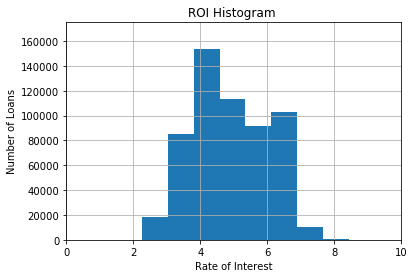

In [40]:
# origdata.plot(kind='scatter', x='CreditScore', y='OriginalInterestRate', s=df.col3)
# origdata.plot( x='CreditScore', y='OriginalInterestRate')
# 
# print(origdata.groupby('OriginalInterestRate')['LoanSequenceNumber'].count())

# plt.hist( origdata.groupby('OriginalInterestRate')['LoanSequenceNumber'].count())
# plt.show()

n, bins, patches = plt.hist(origdata.OriginalInterestRate)


plt.xlabel('Rate of Interest')
plt.ylabel('Number of Loans')
plt.title(r'ROI Histogram ')
plt.axis([0, 10, 0, 175000])
plt.grid(True)

plt.show()

In [3]:
mergedfile=pd.merge(origdata, svcgdata, on='LoanSequenceNumber', how='inner')
mergedfile.shape

(24797432, 33)

In [7]:
# mergedfile=mergedfile.head(10000)
# mergedfile.shape

(10000, 33)

In [4]:
mergedfile['Year'] = ['19'+x if x=='99' else '20'+x for x in (mergedfile['LoanSequenceNumber'].apply(lambda x: x[2:4]))]
mergedfile

MemoryError: 

         CreditScore  FirstPaymentDate  MaturityDate  \
0                742            201603        204602   
1                742            201603        204602   
2                742            201603        204602   
3                742            201603        204602   
4                742            201603        204602   
5                742            201603        204602   
6                742            201603        204602   
7                742            201603        204602   
8                742            201603        204602   
9                742            201603        204602   
10               742            201603        204602   
11               776            201604        204603   
12               776            201604        204603   
13               776            201604        204603   
14               776            201604        204603   
15               776            201604        204603   
16               776            201603        20

In [5]:
mergedfile['Qtr'] = pd.to_datetime(mergedfile.FirstPaymentDate).dt.quarter
mergedfile.head(15)

,CreditScore,FirstPaymentDate,MaturityDate,MortgageInsurancePercentage,OroginalCLTV,OriginalDTIRatio,OriginalUPB,OriginalLTV,OriginalInterestRate,PPMFlag,...,NetSalesProceeds,NonMIRecoveries,Expenses,LegalCosts,MaintenanceAndPreservationCosts,TaxesAndInsurance,ActualLossCalculation,ModificationCost,Year,Qtr
0,742,201603,204602,0,80.0,44,91000,80.0,4.000,N,...,U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
1,742,201603,204602,0,80.0,44,91000,80.0,4.000,N,...,U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
2,742,201603,204602,0,80.0,44,91000,80.0,4.000,N,...,U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
3,742,201603,204602,0,80.0,44,91000,80.0,4.000,N,...,U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
4,742,201603,204602,0,80.0,44,91000,80.0,4.000,N,...,U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
5,742,201603,204602,0,80.0,44,91000,80.0,4.000,N,...,U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
6,742,201603,204602,0,80.0,44,91000,80.0,4.000,N,...,U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
7,742,201603,204602,0,80.0,44,91000,80.0,4.000,N,...,U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
8,742,201603,204602,0,80.0,44,91000,80.0,4.000,N,...,U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1
9,742,201603,204602,0,80.0,44,91000,80.0,4.000,N,...,U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1


In [8]:
mergedfile.loc[:, mergedfile.isnull().any()]

MemoryError: 